In [125]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def exp(x, N, t, C):
    """
    Exponential function to fit the data with uniform background.
    :param x: x values
    :param N: Amplitude
    :param t: Decay constant in 1/us
    :param C: Background constant
    """
    return N * np.exp(-x/t) + C

# Exp. Muon Data Analysis

### Reading the data

In [192]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
data1 = pd.read_csv('24-10-17-20-58.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
# data2 = pd.read_csv('24-10-23-18-15.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data3 = pd.read_csv('muon_accumulation_10_31_to_11_5_2024.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
# data3 = data3[(data3['time']- data3['time'].min())>30*60*60]
# data3 = data3[(data3['time']- data3['time'].min())<90*60*60]


data = pd.concat([data1, data3])
# data = data3

data['time'] = data['time']- data['time'].min()
# data['dt'] = np.log(data['dt'])
# time_gate = data['time']>30*60*60
# data = data[time_gate]


### Fit and Plot

[3.77549970e+03 2.09386923e+00 1.25445463e+02]
[2.30141792e+01 2.09607963e-02 4.79678852e+00]


Text(0.5, 1.0, '$\\mu$ Decay Histogram')

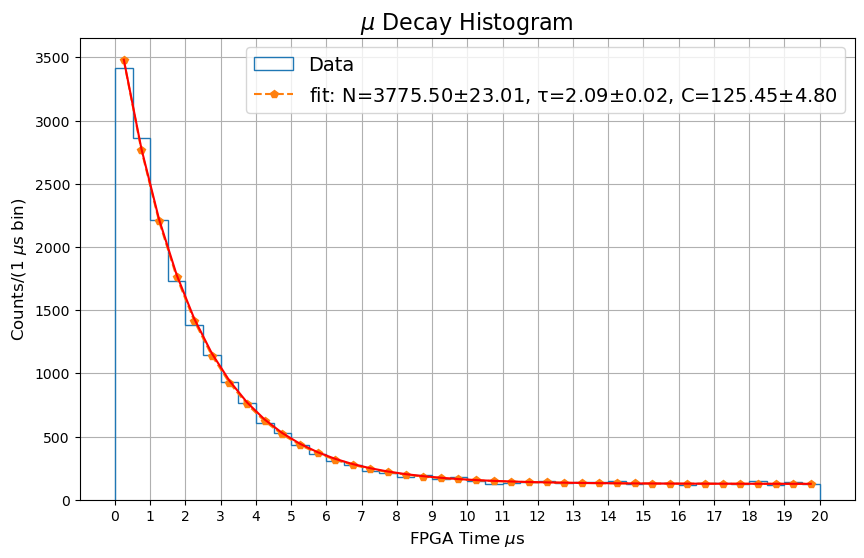

In [193]:
# x = np.arange(0.5,20) # middle of bins


plt.figure(figsize=(10, 6))
hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=40, histtype='step', range = (0, 20), linewidth=1, label='Data')
x = hist[1][1:] - 0.25 # middle of bins
popt, pcov = curve_fit(exp, x, hist[0], p0=[15000, 2.10, 300])

print(popt)
print(np.sqrt(np.diag(pcov)))

plt.xticks(np.arange(0, 21, 1));
plt.grid()

# Plot the data using literature value of 2.2 us
# t = 2.2 # Decay constant in 1/us
t=2.12

plt.plot(x, exp(x, *popt), 'p--', label=f'fit: N={popt[0]:.2f}$\pm${np.sqrt(np.diag(pcov))[0]:.2f}, τ={popt[1]:.2f}$\pm${np.sqrt(np.diag(pcov))[1]:.2f}, C={popt[2]:.2f}$\pm${np.sqrt(np.diag(pcov))[2]:.2f}')

plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)

plt.plot(x, exp(x, popt[0], t, popt[2]), 'r-', label='Ideal curve $τ = 2.2\mu$s')
plt.title("$\mu$ Decay Histogram", fontsize=16)
# plt.yscale('log')
# plt.show()
# plt.savefig('muonPHY451_fig6.jpg', dpi=400)




### Checking for Anomalies

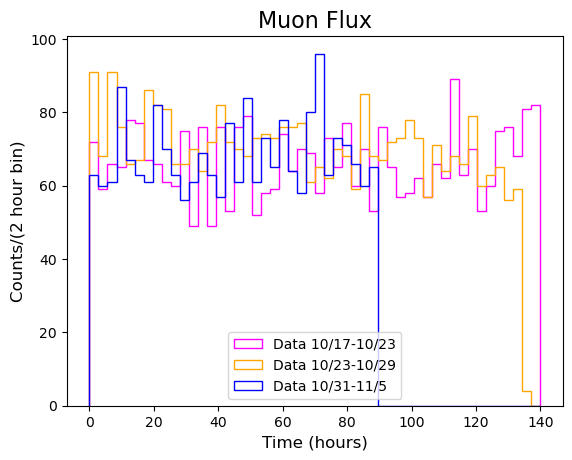

In [158]:
# See if muon flux is constant with time

# gate = data['dt']<20000
# plt.hist(data['time'][gate]/60/60, bins=100, histtype='step', linewidth=1)
# plt.xlabel('Time (hours)', fontsize=12)
# plt.ylabel('Counts/(1 hour bin)', fontsize=12)
colors = ['magenta', 'orange', 'b']
names = ['10/17-10/23', '10/23-10/29', '10/31-11/5']
for i, data in enumerate([data1,data2,data3]):
    data['time'] = data['time']- data['time'].min()
    gate = data['dt']<1000
    plt.hist(data['time'][gate]/60/60, bins=50, histtype='step', linewidth=1, label=f'Data {names[i]}', color=colors[i],range = (0, 140))
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Counts/(2 hour bin)', fontsize=12)
plt.title('Muon Flux', fontsize=16)
plt.legend()
plt.show()

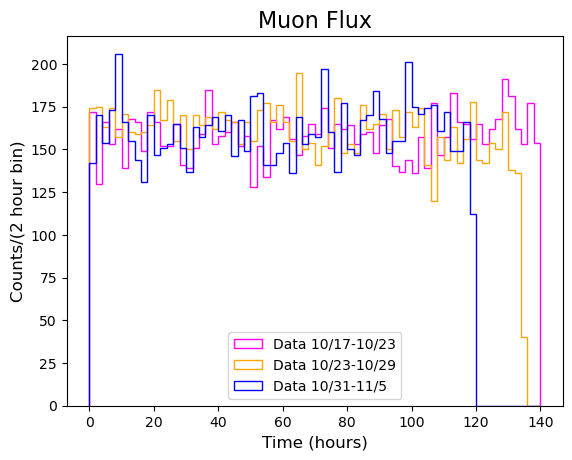

In [106]:
# See if muon flux is constant with time

# gate = data['dt']<20000
# plt.hist(data['time'][gate]/60/60, bins=100, histtype='step', linewidth=1)
# plt.xlabel('Time (hours)', fontsize=12)
# plt.ylabel('Counts/(1 hour bin)', fontsize=12)
colors = ['magenta', 'orange', 'b']
names = ['10/17-10/23', '10/23-10/29', '10/31-11/5']
for i, data in enumerate([data1,data2,data3]):
    data['time'] = data['time']- data['time'].min()
    gate = data['dt']<20000
    plt.hist(data['time'][gate]/60/60, bins=70, histtype='step', linewidth=1, label=f'Data {names[i]}', color=colors[i],range = (0, 140))
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Counts/(2 hour bin)', fontsize=12)
plt.title('Muon Flux', fontsize=16)
plt.legend()
plt.show()

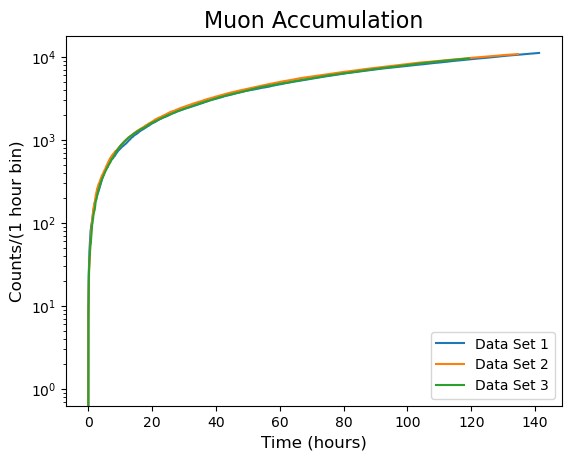

In [98]:
# See if muon flux is constant with time

# gate = data['dt']<20000
# plt.hist(data['time'][gate]/60/60, bins=100, histtype='step', linewidth=1)
# plt.xlabel('Time (hours)', fontsize=12)
# plt.ylabel('Counts/(1 hour bin)', fontsize=12)

for i, data in enumerate([data1,data2,data3]):
    data['time'] = data['time']- data['time'].min()
    gate = data['dt']<20000
    plt.plot(data['time'][gate]/60/60, np.arange(len(data['time'][gate])), label=f'Data Set {i+1}')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Counts/(1 hour bin)', fontsize=12)
plt.title('Muon Accumulation', fontsize=16)
plt.yscale('log')
plt.legend()
plt.show()

# Extrapolating Muon Ratio $\mu^+/\mu^-$ 

[Measurements of Primary and Atmospheric Cosmic-Ray Spectra with the BESS-TeV Spectrometer 2004](http://arxiv.org/abs/astro-ph/0403704v1)


1.15
0.11981277920093726


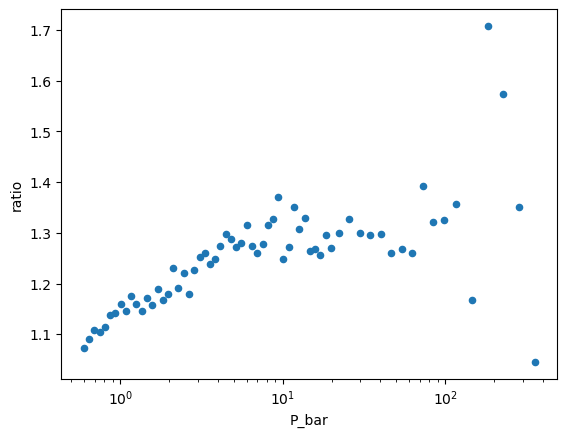

<Figure size 640x480 with 0 Axes>

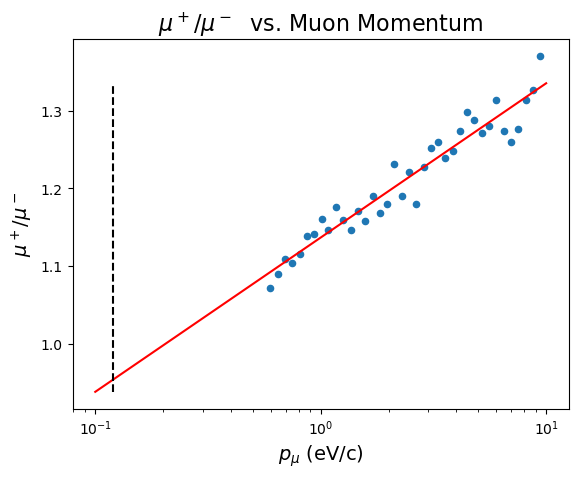

In [ ]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
ratio_data = pd.read_csv('muon_flux.txt', sep=' ', header=None, names=['P_bar_+', 'muon_+', 'P_bar_-', 'muon_-'])
ratio_data['P_bar'] = (ratio_data['P_bar_+'] + ratio_data['P_bar_-']) / 2
ratio_data['ratio'] = ratio_data['muon_+'] / ratio_data['muon_-']

ratio_data.plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=True)

mask = ratio_data['P_bar'] < 10

plt.figure()
ratio_data[mask].plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=True)

def log_func(x, a, b):
    return a * np.log(x) + b

params, cov = curve_fit(log_func, ratio_data[mask]['P_bar'], ratio_data[mask]['ratio'])
plt.title("$\mu^+/\mu^-$  vs. Muon Momentum", fontsize=16)
plt.xlabel("$p_\mu$ (eV/c)", fontsize=14)
plt.ylabel("$\mu^+/\mu^-$", fontsize=14)
#plt.plot(ratio_data[mask]['P_bar'], log_func(ratio_data[mask]['P_bar'], *params), 'r-')
x = np.linspace(0.1, 10, 100)
plt.plot(x, log_func(x, *params), 'r-')
plt.vlines(0.12011, log_func(0.1, *params), log_func(10, *params), 'k', '--')
plt.savefig('muon_PH451_fig9.jpg', dpi=400)

Muon lifetime: 2.1483842999284803
LB 2.1880185460604875
UB 2.109401396520152


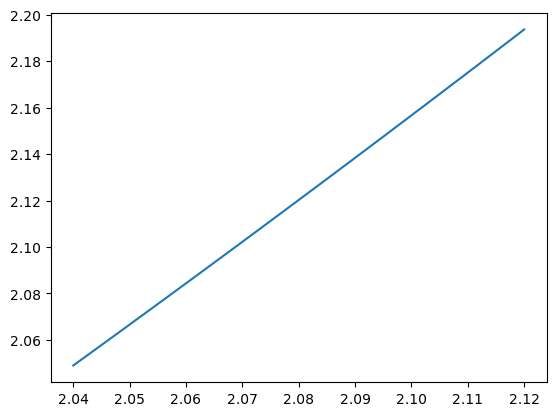

In [200]:
# ratio = log_func(0.12011, *params)
ratio = 1.15
# print(ratio)
def t_obs(t_pos,t_neg,ratio):
    return (1+ratio)*(t_neg * t_pos)/(t_pos + ratio*t_neg)


def ratio_obs(t_pos,t_neg,t_obs):
    return (t_neg-t_obs)/(t_pos - t_obs) * -t_pos/t_neg


def t_pos(t_neg, t_obs, ratio):
    return ratio/((1/t_obs)*(1+ratio)-(1/t_neg))


print("Muon lifetime:",t_pos(2.028, popt[1], 1.28))
print("LB", t_pos(2.028, np.sqrt(np.diag(pcov)[1])+popt[1], 1.28))
print("UB", t_pos(2.028, -np.sqrt(np.diag(pcov)[1])+popt[1], 1.28))


# print(t_obs(2.2, 2.0280, 1.33))
# print(ratio_obs(2.197, 2.028, 2.123))
# print(params)

ratios = np.linspace(0.9, 1.5, 100)
t_obs_vals = np.linspace(2.04, 2.12, 100)
plt.plot(t_obs_vals, t_pos(2.028, t_obs_vals, 1.35))

# Code Graveyard

### Naive Simulation of Data

In [ ]:
# def simulate_data_exp(sims, N, t, C, noise=0.1):
    #     """
    #     Simulate data with exponential decay and uniform background.
    #     :param sims: Number of simulations
    #     :param N: Amplitude
    #     :param t: Decay constant
    #     :param C: Background constant
    #     :param noise: Noise level
    #     """
    #     x = np.linspace(0, 20, sims)
    #     y = exp(x, N, t, C)
    #     y += noise * np.random.randn(sims)
    #     return x, y


    # # Simulate data
    # t = 2.2 # Decay constant in 1/us
    # x, y = simulate_data_exp(100, 5, t, 1)

    # # Fit the data
    # popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

    # plt.plot(x, y, 'o', label='simulation data')
    # plt.plot(x, exp(x, *popt), 'r-', label='fit: N=%5.3f, t=%5.3f, C=%5.3f' % tuple(popt))
    # plt.xlabel('$\mu s$')
    # plt.ylabel('Counts/$\mu s$')
    # plt.legend()
    # plt.show()

### Figure 6... Histogram not centered

In [ ]:
# plt.figure(figsize=(10, 6))
# hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
# plt.xticks(np.arange(0, 21, 1));

# plt.grid()

# # Plot the data using literature value of 2.2 us
# t = 2.2 # Decay constant in 1/us
# plt.plot(np.linspace(0, 20, 100), exp(np.linspace(0, 20, 100), np.max(hist[0]), t, 0), 'r-', label='Ideal curve $τ = 2.2\mu$s')
# plt.title("$\mu$ Decay Histogram", fontsize=16)
# plt.xlabel('FPGA Time $\mu$s',fontsize=12)
# plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
# plt.legend(fontsize=14)
# # plt.show()
# # plt.savefig('muonPHY451_fig6.jpg', dpi=400)
